<a href="https://colab.research.google.com/github/Ashani-Sansala/Ashani-Sansala/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install Required Libraries

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud geopy fuzzywuzzy

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from wordcloud import WordCloud

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

import re
import ast

from fuzzywuzzy import process
from geopy.distance import geodesic

from geopy.exc import GeocoderTimedOut
from sklearn.preprocessing import MultiLabelBinarizer

import folium
from folium.plugins import MarkerCluster
from IPython.core.display import HTML

## Load the Datasets

In [ ]:
# Read the datasets
visitors_data = pd.read_csv('/content/drive/MyDrive/Tech Triathlon/Datathon/Visitors Preference Dataset.csv')
places_data = pd.read_csv('/content/drive/MyDrive/Tech Triathlon/Datathon/Places Dataset.csv', encoding='latin-1')

# Initial Data Exploration

In [ ]:
visitors_data.shape

(10000, 6)

In [ ]:
places_data.shape

(999, 7)

In [ ]:
visitors_data.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka,Unnamed: 5
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell...",NaN
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati...",NaN
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba...",NaN
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C...",NaN
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle...",NaN


In [ ]:
places_data.head()

,name,lat,lng,formatted_address,rating,user_ratings_total,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,1591.0,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,1748.0,['Mirissa Beach is truly a gem on Sri LankaÃ¢Â...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,325.0,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,1438.0,['Hikkaduwa Beach is a delightful escape for s...


In [ ]:
visitors_data.dtypes

,0
User ID,int64
Name,object
Email,object
Preferred Activities,object
Bucket list destinations Sri Lanka,object
Unnamed: 5,float64


In [ ]:
places_data.dtypes

,0
name,object
lat,float64
lng,float64
formatted_address,object
rating,float64
user_ratings_total,float64
latest_reviews,object


In [ ]:
places_data.describe()

,lat,lng,rating,user_ratings_total
count,410.000000,410.000000,355.000000,355.000000
mean,7.304668,80.583211,4.459437,1608.639437
std,0.994841,0.518571,0.433211,3607.678752
min,5.941381,79.694183,0.900000,27.000000
25%,6.629356,80.213274,4.300000,147.000000
50%,7.012780,80.536523,4.500000,375.000000
75%,7.947930,80.946773,4.750000,1245.500000
max,9.820859,81.859583,5.000000,26736.000000


According to the summary statistics, Only 355 entries have ratings and user_ratings_total, indicating some missing data. Latitude ranges from 5.94 to 9.82, longitude from 79.69 to 81.86. This confirms the data covers Sri Lanka's geographical extent.

Most places are highly rated, with a majority scoring between 4.3 and 5.0, though there are some outliers with lower ratings.

In [ ]:
visitors_data.describe()

,User ID,Unnamed: 5
count,10000.00000,0.0
mean,5000.50000,NaN
std,2886.89568,NaN
min,1.00000,NaN
25%,2500.75000,NaN
50%,5000.50000,NaN
75%,7500.25000,NaN
max,10000.00000,NaN


The Unnamed column contains only NaN values, indicating it's either empty or contains non-numeric data. Therefore, that column can be removed in data cleaning phase.

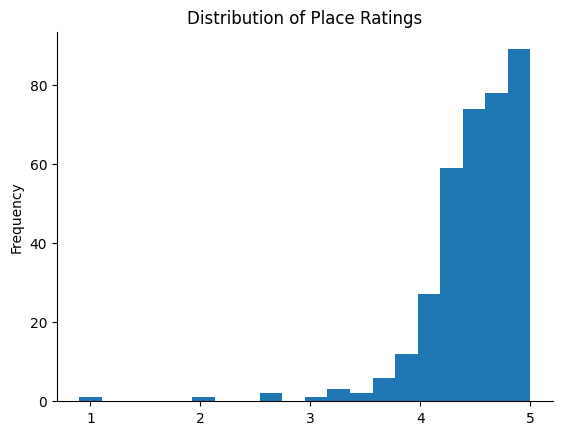

In [ ]:
# Histogram for ratings
places_data['rating'].plot(kind='hist', bins=20, title='Distribution of Place Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

The majority of ratings are clustered between 4.0 and 5.0, with a significant spike in the number of places that have nearly to 5.0 rating. There are very few places with ratings below 4.0, which shows that most places in the dataset have favorable reviews.

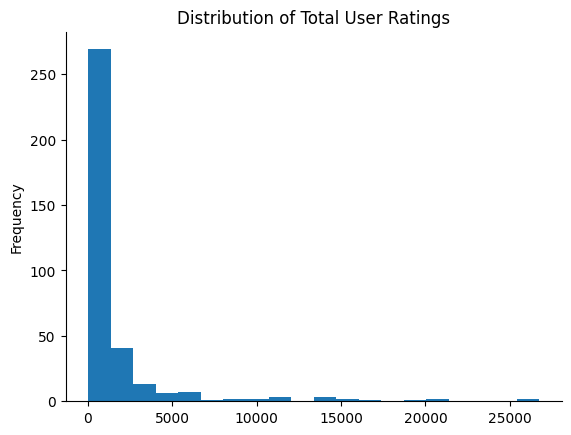

In [ ]:
# Histogram for user_ratings_total
places_data['user_ratings_total'].plot(kind='hist', bins=20, title='Distribution of Total User Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)

The total ratings follow an exponential distribution, with a long tail to the right.

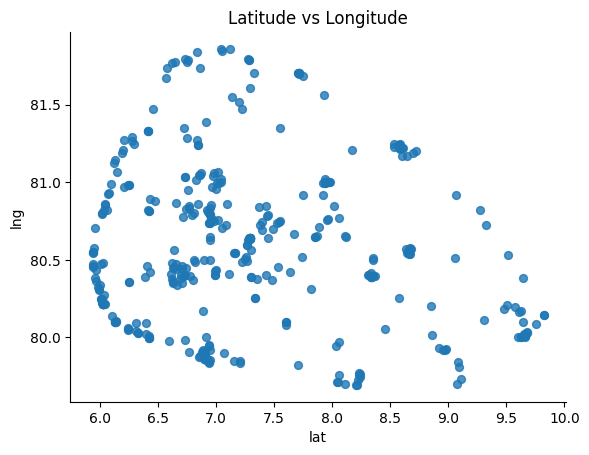

In [ ]:
# Scatter plot for latitude and longitude
places_data.plot(kind='scatter', x='lat', y='lng', title='Latitude vs Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


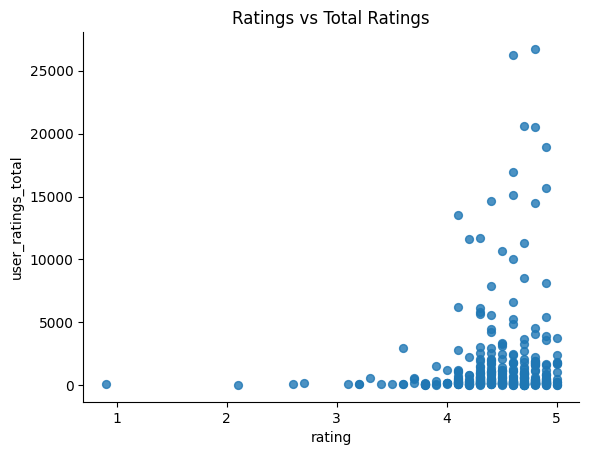

In [ ]:
# Scatter plot for rating and user_ratings_total
places_data.plot(kind='scatter', x='rating', y='user_ratings_total', title='Ratings vs Total Ratings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

According to the graph, Most destinations are rated between 3 and 5, with a significant cluster around 4 and 5. Very few destinations have average ratings below 3, indicating that most visitors have positive experiences in Sri Lanka. The graph reflects popular tourism circuits, with highly-rated, frequently-reviewed destinations potentially representing major attractions.

Destinations with high ratings but fewer total ratings can be suggested for increasing promotion to attract more visitors.

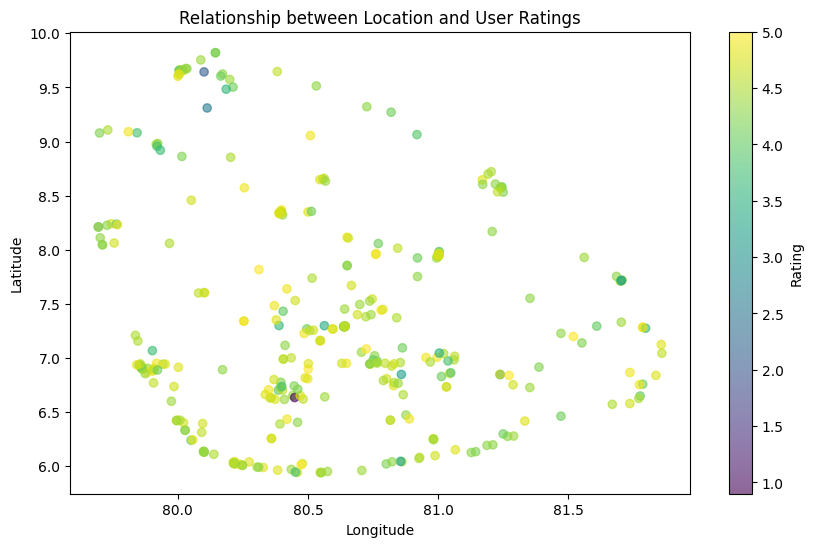

In [ ]:
# Scatter plot to visualize the destinations (latitude, longitude) with their ratings
plt.figure(figsize=(10,6))
scatter = plt.scatter(places_data['lng'], places_data['lat'], c=places_data['rating'], cmap='viridis', alpha=0.6)

plt.colorbar(scatter, label='Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Relationship between Location and User Ratings')
plt.show()

The brighter yellow and green points, which represent higher ratings (closer to 4.0 and 5.0), are more prevalent, indicating that many places are highly rated. These points are scattered across the map, without any clear geographical bias.

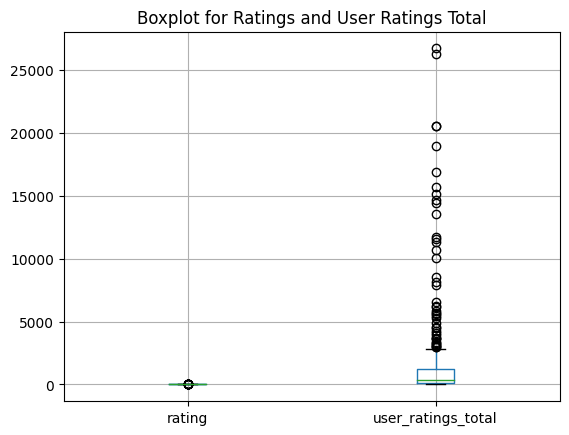

In [ ]:
# Boxplot for Ratings and User Ratings Total
places_data.boxplot(column=['rating', 'user_ratings_total'])
plt.title('Boxplot for Ratings and User Ratings Total')
plt.show()

In [ ]:
places_data['rating'].value_counts()

,count
rating,
4.8,44
4.3,43
4.7,41
4.4,39
4.6,37
4.5,35
4.9,32
4.1,21
4.2,16


In [ ]:
visitors_data.isnull().sum()

,0
User ID,0
Name,0
Email,0
Preferred Activities,0
Bucket list destinations Sri Lanka,0
Unnamed: 5,10000


In [ ]:
places_data.isnull().sum()

,0
name,588
lat,589
lng,589
formatted_address,588
rating,644
user_ratings_total,644
latest_reviews,588


# Data Cleaning and Preprocessing

Under the Data Cleaning and Preprocessing phase, we handled missing values, remove duplicates and noisy data.

## Handling Missing Values

In [ ]:
# Drop the "Unnamed: 5" column
if "Unnamed: 5" in visitors_data.columns:
    visitors_data_cleaned = visitors_data.drop(columns=["Unnamed: 5"])

In [ ]:
# Drop the "user_ratings_total" column
if "user_ratings_total" in places_data.columns:
    places_data_cleaned = places_data.drop(columns=["user_ratings_total"])

In [ ]:
visitors_data_cleaned.head()

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell..."
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati..."
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba..."
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C..."
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle..."


In [ ]:
places_data_cleaned.tail()

,name,lat,lng,formatted_address,rating,latest_reviews
994,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop rows where all values are null
places_data_cleaned = places_data_cleaned.dropna(how='all')

In [ ]:
places_data_cleaned.tail()

,name,lat,lng,formatted_address,rating,latest_reviews
406,Uppuveli Beach,8.607956,81.220013,"Trincomalee, Sri Lanka",4.3,['Uppuveli Beach is a stunning escape! The sof...
407,Koggala Beach,5.992272,80.310691,"Koggala Beach, Sri Lanka",4.3,['Koggala Beach is a hidden gem! The soft sand...
408,Marakolliya Beach,6.042222,80.823073,"Kapuhenwala Road, Sri Lanka",4.3,['Marakolliya Beach is a hidden gem! The waves...
409,Pasikuda Beach,7.929994,81.561185,"Pasikuda Beach, Sri Lanka",4.4,['Pasikuda Beach is a hidden gem! The pristine...
410,Unawatuna Beach,6.009686,80.248424,"Unawatuna Beach, Sri Lanka",4.3,['Unawatuna Beach is a paradise! The soft sand...


In [ ]:
places_data_cleaned.isnull().sum()

,0
name,0
lat,1
lng,1
formatted_address,0
rating,56
latest_reviews,0


In [ ]:
# Check all the rows which contains null values
places_data_cleaned[places_data_cleaned.isnull().any(axis=1)]

,name,lat,lng,formatted_address,rating,latest_reviews
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,['Ahangama was a bit disappointing for me as a...
5,Tangalle,6.024338,80.794073,"Tangalle, Sri Lanka",NaN,['Tangalle was a bit of a letdown for me. The ...
20,Anawilundawa Wetland,7.709595,79.821270,"Anawilundawa Wetland, Sri Lanka",NaN,['I visited Anawilundawa Wetland expecting a v...
23,Anuradhapura,8.311352,80.403651,"Anuradhapura, Sri Lanka",NaN,"['Anuradhapura is rich in history, but I found..."
34,Uppuveli,8.601562,81.219524,"Trincomalee, Sri Lanka",NaN,"['Uppuveli has a stunning shoreline, but I fou..."
35,Koggala,6.000704,80.335236,"Koggala, Sri Lanka",NaN,"['Koggala beach has stunning scenery, but I wa..."
37,Marakolliya,6.061372,80.818401,"Marakolliya, Sri Lanka",NaN,"['Marakolliya has stunning scenery, but my exp..."
46,Mirissa,5.948262,80.471587,"Mirissa, Sri Lanka",NaN,"['I recently went on a sea cruise in Mirissa, ..."
47,Port City Colombo,6.937804,79.836843,"Port City Colombo, Sri Lanka",NaN,"['Port City Colombo has a lot of potential, bu..."
50,Pitawala Nature Trail,7.548983,80.751473,"Pitawala Nature Trail, Sri Lanka",NaN,['The Pitawala Nature Trail was a bit underwhe...


In [ ]:
# Get the visitors records whose bucket lists contain the destinations which the latitudes and longitudes are null.
# This was taken to check whether the visitors dataset contains those destinations in visitors' bucket lists.
missing_data = places_data_cleaned[places_data_cleaned['lat'].isnull() & places_data_cleaned['lng'].isnull()]
visitors_data_cleaned[visitors_data_cleaned['Bucket list destinations Sri Lanka'].str.contains(missing_data['name'].iloc[0], na=False)]

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
32,33,Patricia Thornton,patricia.thornton@example.com,"['animal encounters', 'spiritual retreats', 'a...","['Leisure World', 'Elephant Transit Home', 'Ru..."
56,57,Keith Anderson,keith.anderson@example.com,"['horse shows', 'hot air ballooning', 'water p...","['Water World Lanka', 'Leisure World', 'Dambul..."
95,96,Jonathan Austin,jonathan.austin@example.com,"['traditional ceremonies', 'amusement parks', ...","['Galle Fort', 'Ambuluwawa Tower', 'Leisure Wo..."
101,102,Ana Brown,ana.brown@example.com,"['water parks', 'waterfalls', 'kayaking']","['Bambarakiri Ella', 'Ahungalla', 'Pearl Bay',..."
131,132,Angel Gallegos,angel.gallegos@example.com,"['river cruises', 'architecture tours', 'water...","['Water World Lanka', 'Madu River', 'Leisure W..."
...,...,...,...,...,...
9876,9877,Charles Lang,charles.lang@example.com,"['landscape photography', 'local crafts', 'amu...","['Excel World', 'Leisure World', 'Horton Plain..."
9892,9893,Lynn Mayo,lynn.mayo@example.com,"['amusement parks', 'outdoor adventures', 'hot...","['Madunagala Hot Water Spring', 'Leisure World..."
9964,9965,Kara Mendez,kara.mendez@example.com,"['history tours', 'yoga retreats', 'water parks']","['Leisure World', 'Galle', 'Galle Dutch Fort',..."
9971,9972,Alex Pham,alex.pham@example.com,"['animal encounters', 'yoga retreats', 'water ...","['Leisure World', 'Pearl Bay', 'Yala National ..."


In [ ]:
# Initialize Nominatim geocoder
# geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="my-geocoder-app")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Get latitude and longitude using Nominatim
def get_lat_lng(place, address):
    location = geolocator.geocode(f"{place}, {address}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Filter rows where both latitude and longitude are null
missing_lat_lng = places_data_cleaned[places_data_cleaned['lat'].isnull() & places_data_cleaned['lng'].isnull()]

for idx, row in missing_lat_lng.iterrows():
    place_name = row['name']
    address = row['formatted_address']
    lat, lng = get_lat_lng(place_name, address)

    if lat is not None and lng is not None:
        places_data_cleaned.at[idx, 'lat'] = lat
        places_data_cleaned.at[idx, 'lng'] = lng

In [ ]:
# places_data_cleaned[places_data_cleaned['name']=="Leisure World"]
places_data_cleaned[places_data_cleaned['lat'].isnull() & places_data_cleaned['lng'].isnull()]

,name,lat,lng,formatted_address,rating,latest_reviews


In [ ]:
visitors_data_cleaned.isnull().sum()

,0
User ID,0
Name,0
Email,0
Preferred Activities,0
Bucket list destinations Sri Lanka,0


In [ ]:
places_data_cleaned.isnull().sum()

,0
name,0
lat,0
lng,0
formatted_address,0
rating,56
latest_reviews,0


## Remove Duplicates

In [ ]:
# Remove duplicates of places dataset
places_data_cleaned.drop_duplicates(subset='name')

,name,lat,lng,formatted_address,rating,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,['Mirissa Beach is truly a gem on Sri LankaÃ¢Â...
2,Weligama Beach (surf and stay),5.972486,80.435714,"Weligama, Sri Lanka",4.4,['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362159,"Ahangama, Sri Lanka",NaN,['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,['Hikkaduwa Beach is a delightful escape for s...
...,...,...,...,...,...,...
404,Nilaveli Beach,8.700307,81.192050,"Nilaveli Beach, Sri Lanka",4.5,['Nilaveli Beach is a beautiful escape with st...
406,Uppuveli Beach,8.607956,81.220013,"Trincomalee, Sri Lanka",4.3,['Uppuveli Beach is a stunning escape! The sof...
407,Koggala Beach,5.992272,80.310691,"Koggala Beach, Sri Lanka",4.3,['Koggala Beach is a hidden gem! The soft sand...
408,Marakolliya Beach,6.042222,80.823073,"Kapuhenwala Road, Sri Lanka",4.3,['Marakolliya Beach is a hidden gem! The waves...


In [ ]:
# Remove duplicates of visitors dataset
visitors_data_cleaned.drop_duplicates(subset='Email')

,User ID,Name,Email,Preferred Activities,Bucket list destinations Sri Lanka
0,1,Jennifer Quinn,jennifer.quinn@example.com,"['cycling', 'historical monuments', 'village h...","['Polonnaruwa', 'Hatton', 'Anuradhapura', 'Ell..."
1,2,Emily Perry,emily.perry@example.com,"['butterfly watching', 'hot springs', 'wildlif...","['Madunagala Hot Water Spring', 'Wilpattu Nati..."
2,3,Danielle Mcbride,danielle.mcbride@example.com,"['sea cruises', 'themed parks', 'craft worksho...","['Mirissa Beach', 'Negombo Lagoon', 'Batadomba..."
3,4,Angelica Wilson,angelica.wilson@example.com,"['fishing', 'hot springs', 'sailing']","['Maha Oya Hot Water Springs', 'Colombo Port C..."
4,5,Laurie Powers,laurie.powers@example.com,"['history tours', 'sailing', 'literary tours']","['Negombo Lagoon', 'Colombo Port City', 'Galle..."
...,...,...,...,...,...
9995,9996,Jonathan Hernandez,jonathan.hernandez@example.com,"['paddleboarding', 'river cruises', 'kayaking']","['Ahungalla', 'Bolgoda Lake', 'Unawatuna Beach..."
9996,9997,Cody Gallegos,cody.gallegos@example.com,"['theater', 'scuba diving', 'yoga retreats']","['Kalpitiya', 'Hikkaduwa Coral Sanctuary', 'Tr..."
9997,9998,Amy House,amy.house@example.com,"['sea cruises', 'zip-lining', 'outdoor adventu...","['Hikkaduwa Coral Sanctuary', 'Ella', 'Pigeon ..."
9998,9999,Leslie Aguilar,leslie.aguilar@example.com,"['cycling', 'amusement parks', 'paddleboarding']","['Ella', 'Hatton', 'Negambo', 'Colombo Port Ci..."


## Remove Noise of the Dataset

In [ ]:
# Regex to match any character that is not in the allowed list
pattern = r'[^a-zA-Z0-9\.\{\}\[\]!_,\s]|[^\x00-\x7F]+'

# Remove unwanted characters and reduce multiple spaces
def remove_unwanted_chars(text):
    cleaned_text = re.sub(pattern, '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    return cleaned_text

# Function to clean, normalize, and convert text to lowercase in a DataFrame
def clean_dataframe(df):
    def clean_element(x):
        if isinstance(x, str):
            return remove_unwanted_chars(x).strip().lower()
        elif isinstance(x, list):
            return [remove_unwanted_chars(item).strip().lower() for item in x if isinstance(item, str)]
        return x

    df_cleaned = df.apply(lambda col: col.map(clean_element) if col.dtype == 'object' else col)

    return df_cleaned

# Clean the datasets
visitors_data_cleaned = clean_dataframe(visitors_data_cleaned)
places_data_cleaned = clean_dataframe(places_data_cleaned)

In [ ]:
places_data_cleaned.head(175)

,name,lat,lng,formatted_address,rating,latest_reviews
0,arugam bay beach,6.840408,81.836848,"arugam bay beach, sri lanka",4.8,[arugam bay beach is a surfers paradise! i spe...
1,mirissa beach,5.944703,80.459161,"mirissa, sri lanka",4.6,[mirissa beach is truly a gem on sri lankas so...
2,weligama beach surf and stay,5.972486,80.435714,"weligama, sri lanka",4.4,[weligama beach is a fantastic spot for both b...
3,ahangama,5.973975,80.362159,"ahangama, sri lanka",NaN,[ahangama was a bit disappointing for me as a ...
4,hikkaduwa beach,6.137727,80.099060,"hikkaduwa beach, sri lanka",4.7,[hikkaduwa beach is a delightful escape for so...
...,...,...,...,...,...,...
170,kotte rajamaha vihara,6.881008,79.904750,"sri jayawardenepura kotte, sri lanka",4.8,[visiting kotte rajamaha vihara was a delightf...
171,independence memorial museum,6.904109,79.867606,"colombo, sri lanka",4.6,[the independence memorial museum is a hidden ...
172,dehiwala zoological gardens,6.856981,79.874403,"dehiwalamount lavinia, sri lanka",4.4,[dehiwala zoological gardens is a delightful e...
173,mayan water park,7.068894,79.902236,", sri lanka",3.7,[mayan water park was a decent outing for my f...


In [ ]:
places_data_cleaned.isnull().sum()

,0
name,0
lat,0
lng,0
formatted_address,0
rating,56
latest_reviews,0


In [ ]:
# Safely parse strings into lists
def safe_parse_list(value):
    if pd.isna(value):
        return []
    if value.startswith('[') and value.endswith(']'):
        value = value[1:-1]
        return [x.strip().strip("'").strip('"') for x in value.split(',')]
    else:
        return []

bucket_list_destinations = visitors_data_cleaned['Bucket list destinations Sri Lanka'].apply(safe_parse_list)
all_destinations = [destination for sublist in bucket_list_destinations for destination in sublist]

# Get unique destinations
unique_destinations = list(set(all_destinations))

print(unique_destinations)

['ahungalla', 'bentota beach', 'sri lanka planetarium', 'hikkaduwa', 'udawalawe', 'haputale', 'pinnawala elephant orphanage', 'galle fort', 'hakgala botanical garden', 'ambuluwawa tower', 'devon falls', 'nine arches bridge', 'mihintale', 'elephant transit home', 'mahalenama cave', 'sinharaja forest reserve', 'gangaramaya temple', 'vaddha village camping', 'yala national park', 'kandalama', 'bakers falls', 'water world lanka', 'knuckles', 'polonnaruwa', 'negombo lagoon', 'horton plains', 'bambarakanda falls', 'colombo city tour', 'victoria golf club', 'lionel wendt art centre', 'hambantota', 'mirissa beach', 'sri pada adams peak', 'galle city tour', 'dambulla royal cave temple and golden temple', 'nilaveli beach', 'pinnawala', 'kitugala forest', 'unawatuna', 'bundala national park', 'seetha eliya', 'folk museum', 'batatotalena batadombalena cave', 'viharamahadevi park', 'tangalle', 'meemure', 'perl bay', 'kalpitiya', 'negombo', 'martin wickramasinghe folk museum', 'marakolliya beach', '

In [ ]:
len(all_destinations)

50395

In [ ]:
# Get all distinct values from the 'name' column and convert them to a list
unique_names_list = places_data_cleaned['name'].unique().tolist()

print(len(unique_names_list))

397


In [ ]:
# Subtract elements in unique_destinations from unique_names_list
unique_names_set = set(unique_names_list)  # Convert unique_names_list to a set
unique_destinations_set = set(unique_destinations)  # Convert unique_destinations to a set

# Get the difference
names_not_in_destinations = list(unique_destinations_set - unique_names_set)

print(len(names_not_in_destinations))

50


Below code matches destinations from visitors' bucket lists with a predefined list of places in Sri Lanka. It first geocodes the destination names into coordinates and uses fuzzy string matching to find the closest place name.

It then calculates the geographic distance between the geocoded destination and the matched place. The weighted hybrid matching function combines the fuzzy match score and proximity score to determine the best match, considering both name similarity and geographic closeness.

Finally, it compiles the results into a DataFrame, including the best match, weighted score, and geographic coordinates.

Since the below method takes too much time to complete we interrupted the execution and used an alternative approach to handle the mismatched destination names in bucket lists by comparing with place names in the places name dataset.

In [ ]:
# Initialize the geolocator
#geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="my-geocoder-app")

# Function to geocode destination using Geopy
def geocode_destination(destination):
    try:
        location = geolocator.geocode(destination)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Fuzzy Matching Function
def fuzzy_match(destination, places_list):
    match, score = process.extractOne(destination, places_list)
    return match, score

# Geographic Proximity Check (Haversine Formula)
def calculate_geographic_distance(coord1, coord2):
    return geodesic(coord1, coord2).kilometers

# Function to geocode destination using Geopy
def geocode_destination(destination):
    try:
        location = geolocator.geocode(destination)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return None, None

# Weighted Hybrid Matching
def weighted_match(destination, places_data, fuzzy_weight=0.7, geo_weight=0.3, max_distance_km=50):
    places_list = places_data['name'].tolist()

    # Fuzzy match to find the best match in the places data
    best_match, fuzzy_score = fuzzy_match(destination, places_list)

    # Retrieve coordinates of the best match from places_data
    matched_place_row = places_data[places_data['name'] == best_match]
    lat_best_match, lng_best_match = matched_place_row[['lat', 'lng']].values[0]

    # Geocode the original destination using the Geopy API
    lat_original, lng_original = geocode_destination(destination)

    if lat_original is None or lng_original is None:
        return best_match, fuzzy_score, 0, 0, lat_best_match, lng_best_match

    # Calculate geographic distance between the geocoded original destination and the best match
    geo_distance = calculate_geographic_distance((lat_original, lng_original), (lat_best_match, lng_best_match))

    # If the distance is within the acceptable range, calculate a weighted score
    if geo_distance <= max_distance_km:
        geo_score = (max_distance_km - geo_distance) / max_distance_km * 100  # Higher score for closer matches
        weighted_score = fuzzy_weight * fuzzy_score + geo_weight * geo_score
        return best_match, weighted_score, lat_original, lng_original, lat_best_match, lng_best_match
    else:
        # Return just the fuzzy match if the geographic distance is too large
        return best_match, fuzzy_weight * fuzzy_score, lat_original, lng_original, lat_best_match, lng_best_match


# Apply weighted hybrid matching to each destination in the bucket lists
def apply_weighted_matching(visitors_data, places_data):
    text_match = []

    for index, row in visitors_data.iterrows():
        bucket_list_destinations = row['Bucket list destinations Sri Lanka']

        # Apply the parsing function to the 'Bucket list destinations Sri Lanka'
        bucket_list_destinations = safe_parse_list(bucket_list_destinations)

        for destination in bucket_list_destinations:

            print(f'Destination (from visitors_data): {destination}')

            best_match, weighted_score, lat_original, lng_original, lat_best_match, lng_best_match = weighted_match(destination, places_data)
            text_match.append({
                'User Email (from visitors_data)': row['Email'],
                'Original Destination (from visitors_data)': destination,
                'Best Match (from places_data)': best_match,
                'Weighted Score': weighted_score,
                'Original Lat (via API)': lat_original,
                'Original Lng (via API)': lng_original,
                'Best Match Lat (from places_data)': lat_best_match,
                'Best Match Lng (from places_data)': lng_best_match
            })

            print(f'Best_match (from places_data): {best_match}')
            print(f'Weighted_score: {weighted_score}')
            print(f'Original Lat (via API): {lat_original}')
            print(f'Original Lng (via API): {lng_original}')
            print(f'Best Match Lat (from places_data): {lat_best_match}')
            print(f'Best Match Lng (from places_data): {lng_best_match}\n')

    return pd.DataFrame(text_match)

matched_data = apply_weighted_matching(visitors_data_cleaned, places_data_cleaned)

print(matched_data)

Destination (from visitors_data): polonnaruwa
Best_match (from places_data): polonnaruwa
Weighted_score: 98.77762611385509
Original Lat (via API): 7.9395357
Original Lng (via API): 81.0003387
Best Match Lat (from places_data): 7.940338400000001
Best Match Lng (from places_data): 81.0187984

Destination (from visitors_data): hatton
Best_match (from places_data): yala national park
Weighted_score: 42.0
Original Lat (via API): 47.6397087
Original Lng (via API): -97.4534224
Best Match Lat (from places_data): 6.463961299999998
Best Match Lng (from places_data): 81.47188469999999

Destination (from visitors_data): anuradhapura
Best_match (from places_data): anuradhapura
Weighted_score: 98.3656849186437
Original Lat (via API): 8.334985
Original Lng (via API): 80.4106096
Best Match Lat (from places_data): 8.311351799999999
Best Match Lng (from places_data): 80.4036508

Destination (from visitors_data): ella
Best_match (from places_data): ella rock trailhead
Weighted_score: 62.99999999999999
Or

Best_match (from places_data): port city colombo
Weighted_score: 95.9259427207915
Original Lat (via API): 6.9309255
Original Lng (via API): 79.8420941
Best Match Lat (from places_data): 6.9378036
Best Match Lng (from places_data): 79.8368426

Destination (from visitors_data): negombo lagoon
Best_match (from places_data): negombo lagoon
Weighted_score: 98.40787357242388
Original Lat (via API): 7.1353023
Original Lng (via API): 79.8387041
Best Match Lat (from places_data): 7.1580045
Best Match Lng (from places_data): 79.84648039999999

Destination (from visitors_data): trincomalee harbour


Best_match (from places_data): trincomalee harbour
Weighted_score: 95.89608014168466
Original Lat (via API): 8.57328275
Original Lng (via API): 81.20257235477217
Best Match Lat (from places_data): 8.533333299999999
Best Match Lng (from places_data): 81.25

Destination (from visitors_data): kalpitiya
Best_match (from places_data): kalpitiya
Weighted_score: 99.35194114248092
Original Lat (via API): 8.2368062
Original Lng (via API): 79.7661508
Best Match Lat (from places_data): 8.2295281
Best Match Lng (from places_data): 79.7596142

Destination (from visitors_data): negombo lagoon
Best_match (from places_data): negombo lagoon
Weighted_score: 98.40787357242388
Original Lat (via API): 7.1353023
Original Lng (via API): 79.8387041
Best Match Lat (from places_data): 7.1580045
Best Match Lng (from places_data): 79.84648039999999

Destination (from visitors_data): colombo port city
Best_match (from places_data): port city colombo
Weighted_score: 95.9259427207915
Original Lat (via API): 6.930925

Best_match (from places_data): seethawaka wet zone botanical gardens
Weighted_score: 99.9801954772661
Original Lat (via API): 6.8931707
Original Lng (via API): 80.1715705
Best Match Lat (from places_data): 6.892941
Best Match Lng (from places_data): 80.17176119999999

Destination (from visitors_data): sigiriya
Best_match (from places_data): sigiriya
Weighted_score: 99.94839312775869
Original Lat (via API): 7.95638465
Original Lng (via API): 80.759825710275
Best Match Lat (from places_data): 7.957032699999999
Best Match Lng (from places_data): 80.760257

Destination (from visitors_data): galle dutch fort
Best_match (from places_data): galle dutch fort
Weighted_score: 100
Original Lat (via API): 0
Original Lng (via API): 0
Best Match Lat (from places_data): 6.030459199999999
Best Match Lng (from places_data): 80.2150207

Destination (from visitors_data): kandy temple
Best_match (from places_data): kandy
Weighted_score: 90.44756576054307
Original Lat (via API): 7.2618763
Original Lng (via

Best_match (from places_data): dutch museum
Weighted_score: 70.0
Original Lat (via API): 52.0803787
Original Lng (via API): 4.314834042587045
Best Match Lat (from places_data): 6.9359623
Best Match Lng (from places_data): 79.85163899999999

Destination (from visitors_data): bentota
Best_match (from places_data): cinnamon bentota beach
Weighted_score: 84.56952461460021
Original Lat (via API): 6.3822823
Original Lng (via API): 80.1165229
Best Match Lat (from places_data): 6.424905499999999
Best Match Lng (from places_data): 79.9968753

Destination (from visitors_data): hikkaduwa
Best_match (from places_data): hikkaduwa
Weighted_score: 99.75440157160878
Original Lat (via API): 6.140753
Original Lng (via API): 80.1028181
Best Match Lat (from places_data): 6.1394676
Best Match Lng (from places_data): 80.10628609999999

Destination (from visitors_data): pigeon island
Best_match (from places_data): pigeon island
Weighted_score: 70.0
Original Lat (via API): -20.2657116
Original Lng (via API): 

Best_match (from places_data): kandalama
Weighted_score: 70.0
Original Lat (via API): 7.2728871
Original Lng (via API): 80.1389122
Best Match Lat (from places_data): 7.8884985
Best Match Lng (from places_data): 80.7103532

Destination (from visitors_data): dambulla
Best_match (from places_data): dambulla
Weighted_score: 99.99738386369084
Original Lat (via API): 7.8742031
Original Lng (via API): 80.6510917
Best Match Lat (from places_data): 7.874217000000001
Best Match Lng (from places_data): 80.6511287

Destination (from visitors_data): polonaruwa
Best_match (from places_data): polonnaruwa
Weighted_score: 95.27762611385509
Original Lat (via API): 7.9395357
Original Lng (via API): 81.0003387
Best Match Lat (from places_data): 7.940338400000001
Best Match Lng (from places_data): 81.0187984

Destination (from visitors_data): sigiriya
Best_match (from places_data): sigiriya
Weighted_score: 99.94839312775869
Original Lat (via API): 7.95638465
Original Lng (via API): 80.759825710275
Best Mat

Best_match (from places_data): ella rock trailhead
Weighted_score: 62.99999999999999
Original Lat (via API): 7.2425199
Original Lng (via API): 144.44479591229347
Best Match Lat (from places_data): 6.8578491
Best Match Lng (from places_data): 81.04402259999999

Destination (from visitors_data): victoria golf club


Best_match (from places_data): royal colombo golf club
Weighted_score: 45.5
Original Lat (via API): 48.41494085
Original Lng (via API): -123.29992055018297
Best Match Lat (from places_data): 6.9052268
Best Match Lng (from places_data): 79.8841999

Destination (from visitors_data): madunagala hot water spring
Best_match (from places_data): madunagala hot water spring
Weighted_score: 99.97901789712118
Original Lat (via API): 6.2536639
Original Lng (via API): 80.982025
Best Match Lat (from places_data): 6.253630099999999
Best Match Lng (from places_data): 80.9817108

Destination (from visitors_data): maha oya hot water springs
Best_match (from places_data): maha oya hot water springs
Weighted_score: 100
Original Lat (via API): 0
Original Lng (via API): 0
Best Match Lat (from places_data): 7.552181099999999
Best Match Lng (from places_data): 81.3530409

Destination (from visitors_data): haputale
Best_match (from places_data): haputale
Weighted_score: 99.61656551554566
Original Lat (via API

Best_match (from places_data): kandy
Weighted_score: 99.80988533437299
Original Lat (via API): 7.2931208
Original Lng (via API): 80.6350358
Best Match Lat (from places_data): 7.2905715
Best Match Lng (from places_data): 80.6337262

Destination (from visitors_data): nallur kandaswamy devasthanam
Best_match (from places_data): nallur kandaswamy devasthanam
Weighted_score: 100
Original Lat (via API): 0
Original Lng (via API): 0
Best Match Lat (from places_data): 9.6743625
Best Match Lng (from places_data): 80.0298281

Destination (from visitors_data): velgam vehera buddhist temple
Best_match (from places_data): velgam vehera buddhist temple
Weighted_score: 100
Original Lat (via API): 0
Original Lng (via API): 0
Best Match Lat (from places_data): 8.6471866
Best Match Lng (from places_data): 81.1696845

Destination (from visitors_data): ambuluwawa tower
Best_match (from places_data): ambuluwawa biodiversity complex
Weighted_score: 90.1874660725597
Original Lat (via API): 7.1615272
Original 

KeyboardInterrupt: 

## After Further Improvements of Places Dataset

The missing values of the ratings in the Places dataset have been handled in a seperate notebook. Also the total number of ratings field has been removed since it contains 56 missing values and it may affects the recommendation system's accuracy.

In [ ]:
# Read the improved datasets
final_places_data = pd.read_csv('/content/drive/MyDrive/Tech Triathlon/Datathon/final_places_dataset.csv')

In [ ]:
final_places_data.shape

(397, 8)

In [ ]:
final_places_data.isnull().sum()

,0
name,0
lat,0
lng,0
formatted_address,0
rating,0
user_ratings_total,55
relevent_activities,1
latest_reviews,0


In [ ]:
# Drop the "user_ratings_total" column from new dataset
if "user_ratings_total" in final_places_data.columns:
    final_places_data = final_places_data.drop(columns=["user_ratings_total"])

In [ ]:
final_places_data[final_places_data['relevent_activities'].isnull()]

,name,lat,lng,formatted_address,rating,relevent_activities,latest_reviews
357,Kiranchi Beach,9.310705,80.112706,"Kiranchi, Sri Lanka",2.6,NaN,['Kiranchi Beach was a bit of a disappointment...


In [ ]:
for i in unique_destinations:
  if str(i) == 'kiranchi beach':
    print("Kiranchi Beach is in bucket lists")

In [ ]:
# Remove the record where the relevant activities are missing
final_places_data.drop(final_places_data[final_places_data['name'] == 'Kiranchi Beach'].index, inplace=True)

In [ ]:
final_places_data.isnull().sum()

,0
name,0
lat,0
lng,0
formatted_address,0
rating,0
relevent_activities,0
latest_reviews,0


All the missing values of the places dataset are handled.

In [ ]:
final_places_data.head()

,name,lat,lng,formatted_address,rating,relevent_activities,latest_reviews
0,Arugam Bay Beach,6.840408,81.836848,"Arugam Bay Beach, Sri Lanka",4.8,"[surfing, beachfront dining, kayaking, snorkel...",['Arugam Bay Beach is a surfer's paradise! I s...
1,Mirissa Beach,5.944703,80.459161,"Mirissa, Sri Lanka",4.6,"[beach visits, beachfront dining, surfing, sno...",['Mirissa Beach is truly a gem on Sri Lankas s...
2,Weligama Beach surf and stay,5.972486,80.435714,"Weligama, Sri Lanka",4.4,"[surfing, scuba diving, snorkeling, beach visi...",['Weligama Beach is a fantastic spot for both ...
3,Ahangama,5.973975,80.362160,"Ahangama, Sri Lanka",2.9,"[surfing, beach visits, snorkeling, paddleboar...",['Ahangama was a bit disappointing for me as a...
4,Hikkaduwa Beach,6.137727,80.099060,"Hikkaduwa Beach, Sri Lanka",4.7,"[surfing, snorkeling, turtle watching, beach v...",['Hikkaduwa Beach is a delightful escape for s...


In [ ]:
# remove noise of the updated places dataset by using the previously defined function
final_places_data = clean_dataframe(final_places_data)

# Feature Engineering

A new column called "relevent_activities" is added to the places dataset which contains the lists of relevant activities for each place. It was done in a seperate notebook.

Also the total number of ratings field has been removed since it contains 56 missing values and it may affects the recommendation system's accuracy.

## Reduce Dimensions of Visitors Data

Name is irrelevant for modeling. Email is also an irrelevant and sensitive information.

In [ ]:
# Drop the 'Name' column
visitors_data_cleaned = visitors_data_cleaned.drop(columns=['Name'])

In [ ]:
# Drop the 'Email' column
visitors_data_cleaned = visitors_data_cleaned.drop(columns=['Email'])

## One Hot Encoding

In [ ]:
# Apply the previous parsing function to the 'relevant_activities' column
final_places_data['relevent_activities'] = final_places_data['relevent_activities'].apply(safe_parse_list)

all_activities = [activity for sublist in final_places_data['relevent_activities'] for activity in sublist]

# Print the number of unique activities
print(f"Number of unique activities: {len(set(all_activities))}")

                           name  \
0              arugam bay beach   
1                 mirissa beach   
2  weligama beach surf and stay   
3                      ahangama   
4               hikkaduwa beach   

                                 relevent_activities  
0  [surfing, beachfront dining, kayaking, snorkel...  
1  [beach visits, beachfront dining, surfing, sno...  
2  [surfing, scuba diving, snorkeling, beach visi...  
3  [surfing, beach visits, snorkeling, paddleboar...  
4  [surfing, snorkeling, turtle watching, beach v...  
Number of unique activities: 115
Unique activities:
['amusement parks', 'animal encounters', 'archaeological sites', 'archaeology tours', 'architectural photography', 'architectural tours', 'architecture photography', 'architecture tours', 'art classes', 'arts and culture', 'ayurvedic spa treatments', 'beach dining', 'beach visits', 'beach volleyball', 'beachfront dining', 'bird watching', 'boat safaris', 'boating', 'body surfing', 'botanical gardens', 'b

In [ ]:
# Perform one-hot encoding on the relevent_activities
def one_hot_encode_activities(df, activity_column='relevent_activities'):
    mlb = MultiLabelBinarizer()
    one_hot_encoded = mlb.fit_transform(df[activity_column])

    activity_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_, index=df.index)

    result_df = pd.concat([df, activity_df], axis=1)

    return result_df, mlb.classes_

# Perform one-hot encoding
places_df_encoded, activity_features = one_hot_encode_activities(final_places_data)

# Print the shape of the new DataFrame
print(f"Shape of the encoded DataFrame: {places_df_encoded.shape}")

# Print the first few rows of the encoded DataFrame
print(places_df_encoded.head())

# Print the list of activity features
print("\nActivity features:")
print(activity_features)

Shape of the encoded DataFrame: (396, 122)
                           name       lat        lng  \
0              arugam bay beach  6.840408  81.836848   
1                 mirissa beach  5.944703  80.459161   
2  weligama beach surf and stay  5.972486  80.435714   
3                      ahangama  5.973975  80.362160   
4               hikkaduwa beach  6.137727  80.099060   

             formatted_address  rating  \
0  arugam bay beach, sri lanka     4.8   
1           mirissa, sri lanka     4.6   
2          weligama, sri lanka     4.4   
3          ahangama, sri lanka     2.9   
4   hikkaduwa beach, sri lanka     4.7   

                                 relevent_activities  \
0  [surfing, beachfront dining, kayaking, snorkel...   
1  [beach visits, beachfront dining, surfing, sno...   
2  [surfing, scuba diving, snorkeling, beach visi...   
3  [surfing, beach visits, snorkeling, paddleboar...   
4  [surfing, snorkeling, turtle watching, beach v...   

                              

In [ ]:
places_df_encoded.head()

,name,lat,lng,formatted_address,rating,relevent_activities,latest_reviews,amusement parks,animal encounters,archaeological sites,...,walking,water parks,water skiing,water sports,waterfalls,waterfront dining,whale watching,wildlife viewing,yoga retreats,ziplining
0,arugam bay beach,6.840408,81.836848,"arugam bay beach, sri lanka",4.8,"[surfing, beachfront dining, kayaking, snorkel...",[arugam bay beach is a surfers paradise! i spe...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mirissa beach,5.944703,80.459161,"mirissa, sri lanka",4.6,"[beach visits, beachfront dining, surfing, sno...",[mirissa beach is truly a gem on sri lankas so...,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,weligama beach surf and stay,5.972486,80.435714,"weligama, sri lanka",4.4,"[surfing, scuba diving, snorkeling, beach visi...",[weligama beach is a fantastic spot for both b...,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ahangama,5.973975,80.362160,"ahangama, sri lanka",2.9,"[surfing, beach visits, snorkeling, paddleboar...",[ahangama was a bit disappointing for me as a ...,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,hikkaduwa beach,6.137727,80.099060,"hikkaduwa beach, sri lanka",4.7,"[surfing, snorkeling, turtle watching, beach v...",[hikkaduwa beach is a delightful escape for so...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def create_activity_map(df, activity_columns):
    # Create a base map centered on Sri Lanka
    m = folium.Map(location=[7.8731, 80.7718], zoom_start=8)

    # Create a marker cluster
    marker_cluster = MarkerCluster().add_to(m)

    # Color mapping for activities (you can customize this)
    color_map = {
        'surfing': 'blue',
        'snorkeling': 'green',
        'beach visits': 'red',
        'kayaking': 'purple',
        'turtle watching': 'orange',
        'amusement parks': 'pink',
        'animal encounters': 'brown',
        'aquarium': 'gray',
        'archaeological sites': 'magenta',
        'archaeology tours': 'cyan',
        'architectural photography': 'light brown',
        'architectural tours': 'light green',
        'art galleries': 'light blue',
        'art classes': 'light orange',
        'art installation': 'light purple',
        'art museums': 'light red',
        'arts and culture': 'light yellow',
        'ayurvedic spa treatments': 'black',
        'beach dining':'maroon'
    }

    # Add markers for each place
    for idx, row in df.iterrows():
        # Create popup content
        popup_content = f"<b>{row['name']}</b><br>"
        popup_content += "Activities:<br>"
        for activity in activity_columns:
            if row[activity] == 1:
                popup_content += f"- {activity}<br>"

        # Create marker
        folium.Marker(
            location=[row['lat'], row['lng']],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color=color_map.get(row['relevent_activities'][0], 'gray'))
        ).add_to(marker_cluster)

    return m

# Get the list of activity columns (assuming they start with 'activity_')
activity_columns = [col for col in places_df_encoded.columns if col.startswith('activity_')]

# Create the map
activity_map = create_activity_map(places_df_encoded, activity_columns)

# Save the map to an HTML file
activity_map.save("sri_lanka_activities_map.html")

print("Map has been saved as 'sri_lanka_activities_map.html'. Open this file in a web browser to view the interactive map.")

<ipython-input-210-a41c76ed4da9>:53: UserWarning: color argument of Icon should be one of: {'red', 'darkgreen', 'darkred', 'gray', 'pink', 'lightred', 'lightgray', 'orange', 'lightblue', 'blue', 'white', 'lightgreen', 'beige', 'green', 'darkblue', 'darkpurple', 'purple', 'cadetblue', 'black'}.
  icon=folium.Icon(color=color_map.get(row['relevent_activities'][0], 'gray'))


Map has been saved as 'sri_lanka_activities_map.html'. Open this file in a web browser to view the interactive map.


## Get the Word Cloud

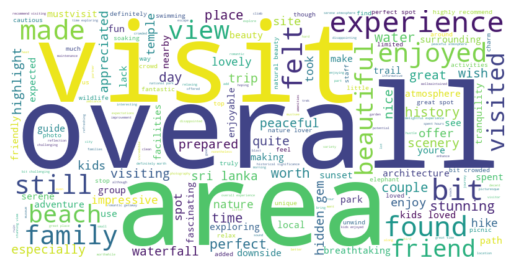

In [ ]:
text = ' '.join(places_df_encoded['latest_reviews'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

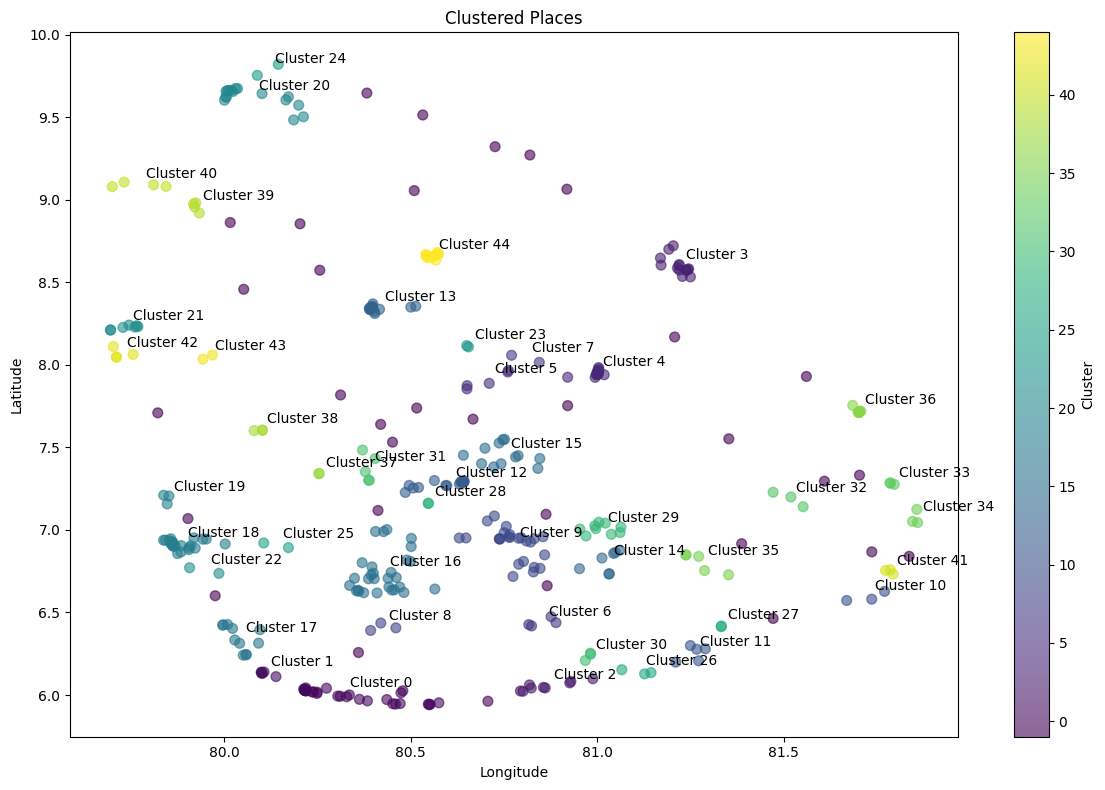

cluster
-1     33
 0     37
 1      6
 2      9
 3     14
 4     20
 5      5
 6      4
 7      2
 8      3
 9     25
 10     3
 11     5
 12    19
 13    15
 14     7
 15    12
 16    29
 17    11
 18    26
 19     3
 20    16
 21     7
 22     2
 23     2
 24     2
 25     2
 26     3
 27     2
 28     2
 29     9
 30     3
 31     5
 32     3
 33     3
 34     3
 35     5
 36     7
 37     2
 38     3
 39     4
 40     4
 41     3
 42     4
 43     2
 44    10
Name: count, dtype: int64


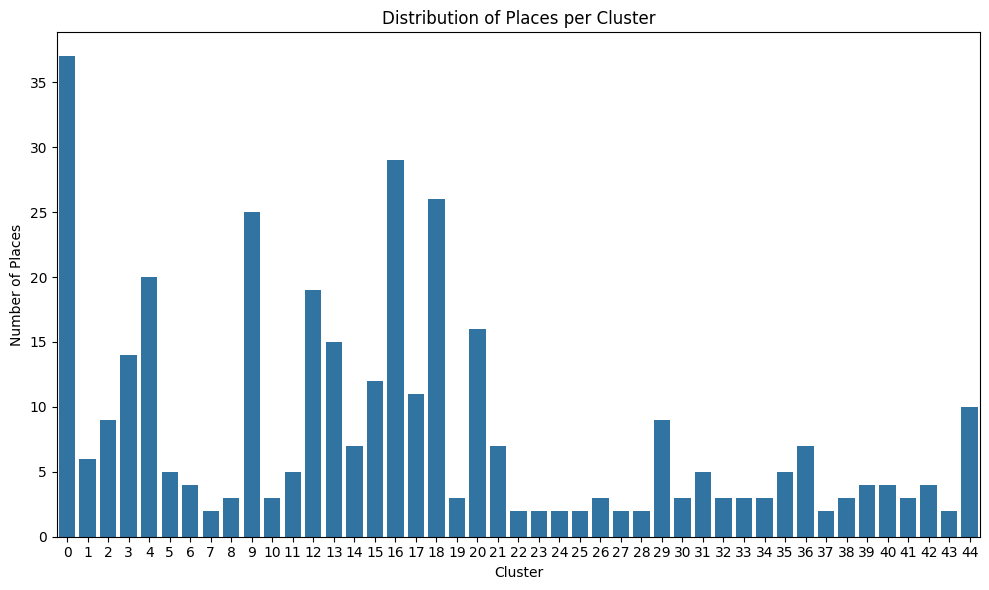

In [ ]:
def cluster_places(df, eps=10, min_samples=2):
    coords = df[['lat', 'lng']].values
    kms_per_radian = 6371.0088
    epsilon = eps / kms_per_radian
    db = DBSCAN(eps=epsilon, min_samples=min_samples, metric='haversine').fit(np.radians(coords))
    df['cluster'] = db.labels_
    return df

# Cluster the places
clustered_places = cluster_places(places_df_encoded)

# Visualize the clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(clustered_places['lng'], clustered_places['lat'],
                      c=clustered_places['cluster'], cmap='viridis',
                      s=50, alpha=0.6)

plt.colorbar(scatter, label='Cluster')
plt.title('Clustered Places')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add cluster labels
for cluster in clustered_places['cluster'].unique():
    if cluster != -1:  # Exclude noise points
        cluster_points = clustered_places[clustered_places['cluster'] == cluster]
        centroid = cluster_points[['lng', 'lat']].mean()
        plt.annotate(f'Cluster {cluster}',
                     xy=(centroid['lng'], centroid['lat']),
                     xytext=(5, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

# Print cluster statistics
print(clustered_places['cluster'].value_counts().sort_index())

# Visualize the distribution of places per cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=clustered_places[clustered_places['cluster'] != -1])
plt.title('Distribution of Places per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Places')
plt.tight_layout()
plt.show()